<a href="https://colab.research.google.com/github/ace26597/ANN-from-Scratch/blob/main/ANN_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

Step 1 :

---



In [ ]:
dataset = pd.read_csv('drive/My Drive/Colab Data/Titanic.csv',usecols=[1,2,4,5,6])
print(dataset.shape)
print(dataset.isnull().sum(axis=0))
dataset.dropna(inplace=True)
dataset = pd.get_dummies(dataset, columns=['sex'])
dataset.head()
dataset = pd.get_dummies(dataset, columns=['pclass'])
dataset.head()

label_encoder = preprocessing.LabelEncoder()
dataset['survived'] = label_encoder.fit_transform(dataset['survived'])
print(dataset.head())
print(dataset.shape)
scaler = StandardScaler()
scaler.fit_transform(dataset)

(1309, 5)
pclass        0
survived      0
sex           0
age         263
sibsp         0
dtype: int64
   survived      age  sibsp  ...  pclass_1st  pclass_2nd  pclass_3rd
0         1  29.0000      0  ...           1           0           0
1         1   0.9167      1  ...           1           0           0
2         0   2.0000      1  ...           1           0           0
3         0  30.0000      1  ...           1           0           0
4         0  25.0000      1  ...           1           0           0

[5 rows x 8 columns]
(1046, 8)


array([[ 1.20401358, -0.06116183, -0.55155301, ...,  1.63801666,
        -0.57661432, -0.95878363],
       [ 1.20401358, -2.01049644,  0.54526153, ...,  1.63801666,
        -0.57661432, -0.95878363],
       [-0.83055541, -1.93530178,  0.54526153, ...,  1.63801666,
        -0.57661432, -0.95878363],
       ...,
       [-0.83055541, -0.23469331, -0.55155301, ..., -0.6104944 ,
        -0.57661432,  1.04298818],
       [-0.83055541, -0.19998701, -0.55155301, ..., -0.6104944 ,
        -0.57661432,  1.04298818],
       [-0.83055541, -0.06116183, -0.55155301, ..., -0.6104944 ,
        -0.57661432,  1.04298818]])


---

Step 2 :

---



In [ ]:
X = dataset.iloc[:,1:]
Y = dataset.iloc[:, 0] 
#print(X.head())
#print(Y.head())
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train)
del(X)
del(Y)
del(dataset)

       age  sibsp  sex_female  sex_male  pclass_1st  pclass_2nd  pclass_3rd
394   18.0      0           0         1           0           1           0
797   40.5      0           0         1           0           0           1
632   39.0      1           1         0           0           0           1
788   45.0      0           0         1           0           0           1
806   21.0      2           1         0           0           0           1
...    ...    ...         ...       ...         ...         ...         ...
220   22.0      0           1         0           1           0           0
265   28.0      0           0         1           1           0           0
392   24.0      1           1         0           0           1           0
285   67.0      1           0         1           1           0           0
1188  24.0      0           1         0           0           0           1

[836 rows x 7 columns]




---

Approach 1 :

---



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic',solver='adam',learning_rate='constant',momentum=0.9,alpha=0.0001,hidden_layer_sizes=(4, 2),max_iter=5000,random_state=0)
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

cf_train = confusion_matrix(Y_train, y_pred_train)
cf_test = confusion_matrix(Y_test, y_pred_test)

print(cf_train)
print(cf_test)

clf = MLPClassifier(activation='logistic',solver='adam',learning_rate='constant',momentum=0.9,alpha=0.0001,hidden_layer_sizes=(5, 5),max_iter=5000, random_state=0)
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

cf_train = confusion_matrix(Y_train, y_pred_train)
cf_test = confusion_matrix(Y_test, y_pred_test)

print(cf_train)
print(cf_test)

[[453  40]
 [135 208]]
[[119   7]
 [ 31  53]]
[[450  43]
 [128 215]]
[[118   8]
 [ 29  55]]




---

Approach 2 :

---



Layer =  [[ 0.08631611  0.0526686   0.08452122  0.02646817]
 [ 0.21748061  0.01660202  0.1372485   0.12617361]
 [ 0.03289277  0.05080873  0.147105    0.03261403]
 [ 0.01814004 -0.10691611 -0.02394597 -0.06339683]
 [ 0.05736774 -0.01219454  0.05177315 -0.00772514]
 [ 0.18268422 -0.14797975 -0.11154945  0.10686284]
 [ 0.02970203 -0.01428433  0.15330285 -0.07118626]] sigmoid [0.92506397 0.97518028 0.78916835 0.02509853]
Layer =  [[ 0.0999636  -0.00862195 -0.14596505]
 [-0.01524245 -0.00056007  0.00646291]
 [-0.02498409  0.03102349  0.04549201]
 [-0.04427065  0.08781915 -0.0403931 ]] sigmoid [0.49512521 0.24187534 0.15905624]
Layer =  [[ 0.03065182  0.07431357]
 [ 0.07772381  0.05629812]
 [-0.06712452  0.06764023]] sigmoid [0.3567814  0.45932602]
Epoch: #0, mse: 0.594498
Epoch: #100, mse: 0.594498
Epoch: #200, mse: 0.594498
Epoch: #300, mse: 0.594498
Epoch: #400, mse: 0.594498
Epoch: #500, mse: 0.549043
Epoch: #600, mse: 0.497608
Epoch: #700, mse: 0.483254
Epoch: #800, mse: 0.477273
Epoch:

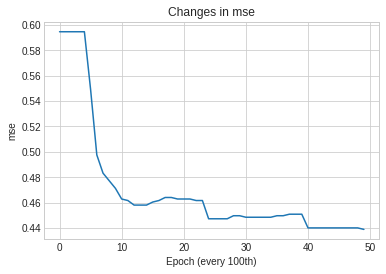

In [ ]:
class Layer:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None,last_weights=None):
        self.weights = weights if weights is not None else 0.1*np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.rand(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None
        print("Layer = ",self.weights,self.activation,self.bias)

    def activate(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
          return r
        return 1 / (1 + np.exp(-r))

    def apply_activation_derivative(self, r):
        if self.activation is None:
          return r
        return r * (1 - r)


class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return np.argmax(ff, axis=1)

    def backpropagation(self, X, y, learning_rate, momentum):
        # Feed forward for the output
        alpha = 0.8
        output = self.feed_forward(X)
        # Loop over the layers backward

        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]

            if layer == self._layers[-1]:
                layer.error = y - output
                # The output = layer.last_activation in this case
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = alpha * np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # Update the weights
        prev_weight=[[],[],[]]
        prev_weight[0] =  0*np.random.randn(7, 4)
        prev_weight[1] =  0*np.random.randn(4, 3)
        prev_weight[2] =  0*np.random.randn(3, 2)
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            momentum_term = momentum * prev_weight[i]
            layer.weights = layer.weights + (layer.delta * input_to_use.T * learning_rate) + momentum_term 
            prev_weight[i] = layer.weights
    

    def train(self, X, y, learning_rate, max_epochs,momentum):
        mses = []
        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate,momentum)
            if i % 100 == 0:
                mse = np.mean(np.square(y - np.argmax(nn.feed_forward(X),axis=1)))
                mses.append(mse)
                print('Epoch: #%s, mse: %f' % (i, float(mse)))
        return mses

    @staticmethod
    def accuracy(y_pred, y_true):
        return (y_pred == y_true).mean()

nn = NeuralNetwork()
nn.add_layer(Layer(7, 4, 'sigmoid'))
nn.add_layer(Layer(4, 3, 'sigmoid'))
nn.add_layer(Layer(3, 2, 'sigmoid'))

momentum = 0.8
learning_rate = 0.0002
epochs = 5000
# Train the neural network
X_train = np.array(X_train)
Y_train = np.array(Y_train)
errors = nn.train(X_train, Y_train, learning_rate, epochs,momentum)

y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)

print('Accuracy: %.2f%%' % (nn.accuracy(y_pred_train, Y_train) * 100))
print('Accuracy: %.2f%%' % (nn.accuracy(y_pred_test, Y_test) * 100))
cf_train = confusion_matrix(Y_train, y_pred_train)
cf_test = confusion_matrix(Y_test, y_pred_test)
print(cf_train)
print(cf_test)
# Plot changes in mse
plt.plot(errors)
plt.title('Changes in mse')
plt.xlabel('Epoch (every 100th)')
plt.ylabel('mse')
plt.show()